# Lab Week 9

## EOSC 211

### Learning Objectives:

1. Debug code

(other possibilities):

2. use dictionary keys to reference complex datasets instead of RC indexing

3. work with purely functional code?

### Intro

[link to 9 debugging commandments](https://www.tygertec.com/9-rules-debugging/)

Are we going to use a formal debugger? 

or...

Pivot learning goals and use this week to talk about dictionaries?

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# get the datafile
the_file = np.genfromtxt("lab9_old/mgsva_MJJ.csv",delimiter=",")

# extract variables from the csv
lats = the_file[:,1]
lons = the_file[:,2]
u_vel = the_file[:,3]
v_vel = the_file[:,4]
#u_dev = the_file[:,5]
#v_dev = the_file[:,6]

# or
var_dict = {"lats":the_file[:,1], 
            "lons":the_file[:,2], 
            "u_vel":the_file[:,3],
            "v_vel":the_file[:,4]}
            #"u_dev":the_file[:,5],
            #"v_dev":the_file[:,6]}

In [4]:
def move_to_grid(lats, lons, u_vel, v_vel):
    """
    function to create 2D arrays out of FORTRAN formatted csv data
    
    in:
    csv file with columns 15000., lon, lat, u_vel, v_vel, u_dev, v_dev
    
    (dev is the standard deviation of each velocity measurement, 15000.
    is an artifact from FORTRAN formatting)
    
    out: 
    2D arrays: coords, u, v, udev, vdev
    """
    # set up grids
    # initializing with NaNs also automatically deals with points where there is
    # no data (eg. on land) because those locations will simply contain NaNs
    lon_0 = np.arange(-179,180)
    lat_0 = np.arange(-89, 89)

    u = np.full([179, 360], np.nan)
    v = np.full([179, 360], np.nan)

    # Loop through all points in .csv file.
    #
    # For each, calculate the row/col indices
    # from the lat/longs.  Lats get converted
    # into row indices 'i', and longs into column
    # indices 'j'. Since we have a 1 degree spacing
    # we just have to add the right offset
    # to make this work - for example, for latitudes
    # latitude of -89 goes to row 1,
    # latitude of -88 goes to row 2, etc.
    #
    # Then write the
    # corresponding U/V data for that lat/long
    # into the right place (i.e. index (i,j) )
    # in the U/V matrices 

    
    for k in range(len(lats)):
        i = int(lons[k]) + 78  # row index
        j = int(lats[k]) + 179  # column index
        u[i,j] = u_vel[k]
        v[i,j] = v_vel[k]
        
    return lon_0, lat_0, u, v



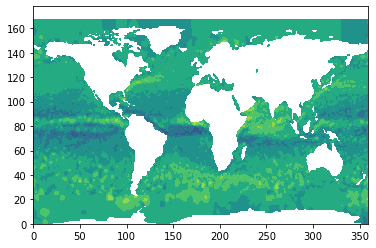

In [8]:
lons, lats, u, v = move_to_grid(**var_dict)  # the cool way
#lons, lats, u, v = move_to_grid(lats, lons, u_vel, v_vel)  # the standard way
                               
plt.contourf(u)

In [10]:
# splatting and tutorial snippet

my_list = [3,4]
my_dict = {"a":5, "b":6}

def print_vars(a, b):
    print(a)
    print(b)
    return None

print("normal function call:")
print_vars(1,2)  
print("splat from a list (or tuple)")
print_vars(*my_list)
print("double splat from a dictionary")
print_vars(**my_dict)

normal function call:
1
2
splat from a list (or tuple)
3
4
double splat from a dictionary
5
6
